In [1]:
# ! pip install pandas numpy scikit-learn plotly matplotlib
# ! pip install nbformat
# ! pip install --upgrade nbformat
# ! pip install tensorflow[and-cuda]

## Notes

#### Imports

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime as dt
import glob

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Rescaling, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, F1Score
import visualkeras

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

2024-10-18 10:10:28.612041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 10:10:28.624128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 10:10:28.627625: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 10:10:28.637766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 10:10:30.397884: W tensorflow/compiler/tf2

In [3]:
# Check if GPUs are available for training 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


I0000 00:00:1729239033.084753   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729239033.154815   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729239033.155041   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [4]:
DATASET_FOLDER_TRAIN = 'CIFAKE/train'
DATASET_FOLDER_TEST = 'CIFAKE/test'

BATCH_SIZE = 24
COLOR_MODE = 'grayscale'
CLASS_MODE = 'binary'
TARGET_SIZE = (32, 32)
LEARN_RATE = 0.0005
SEED = 42

N_EPOCHS = 15

#### Train/test sets

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,  
    vertical_flip=True,  
    validation_split=0.3,  
)

# Load training data from directory and apply transformations
train_generator = train_datagen.flow_from_directory(
    DATASET_FOLDER_TRAIN,  
    target_size=TARGET_SIZE,    
    color_mode=COLOR_MODE,  
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,  
    subset='training', 
    seed = SEED
)

# Load validation data (20% of the training data)
validation_generator = train_datagen.flow_from_directory(
    DATASET_FOLDER_TRAIN, 
    target_size=TARGET_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    subset='validation', 
    shuffle=False,
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    DATASET_FOLDER_TEST,  
    target_size=TARGET_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
)

Found 70000 images belonging to 2 classes.
Found 30000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


#### EDA

In [6]:
print('Class distribution: ')
print( f'Train REAL images: {len(glob.glob('CIFAKE/train/REAL/*'))}'  )
print( f'Train FAKE images: {len(glob.glob('CIFAKE/train/FAKE/*'))}'  )

print( f'Test REAL images: {len(glob.glob('CIFAKE/test/REAL/*'))}'  )
print( f'Test FAKE images: {len(glob.glob('CIFAKE/test/FAKE/*'))}'  )

Class distribution: 
Train REAL images: 50000
Train FAKE images: 50000
Test REAL images: 10000
Test FAKE images: 10000


In [7]:
# Show random image

#### Image normalisation

In [8]:
# Image normalisation

#### Build model

In [9]:
# Build model
# https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-resnet    VGG-19

def CNN_model01():
    model = Sequential([
        Input(shape=train_generator.image_shape), 

        Conv2D(32, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        
        Conv2D(32, 3, activation='relu', padding='same'),
        MaxPooling2D(),

        # Conv2D(128, 3, activation='relu', padding='same'),
        # # Conv2D(128, 3, activation='relu', padding='same'),


        # # Conv2D(256, 3, activation='relu', padding='same'),
        # # Conv2D(256, 3, activation='relu'),
        # # Conv2D(256, 3, activation='relu'),
        # # Conv2D(256, 3, activation='relu'),

        # # Conv2D(512, 3, activation='relu'),
        # # Conv2D(512, 3, activation='relu'),
        # # Conv2D(512, 3, activation='relu'),
        # # Conv2D(512, 3, activation='relu'),

        Flatten(),
        Dense(16, activation='relu'),
        # Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile( optimizer=Adam(learning_rate=LEARN_RATE), 
                  loss=BinaryCrossentropy(),
                  metrics = ['accuracy', Precision(), Recall()] )#, 'f1_score'])

    return model

I0000 00:00:1729239034.709866   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729239034.710120   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729239034.710303   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729239034.775011   67427 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

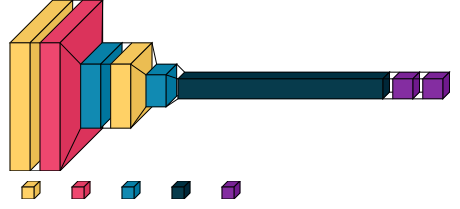

In [10]:
visualkeras.layered_view(CNN_model01(), legend=True)

#### Train model

In [11]:
model = CNN_model01()

In [ ]:
history = model.fit(train_generator, epochs=N_EPOCHS, batch_size=BATCH_SIZE, validation_data=(validation_generator),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]
                    )

Epoch 1/15


I0000 00:00:1729239036.327728   67827 service.cc:146] XLA service 0x7268580060e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729239036.327750   67827 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-10-18 10:10:36.365703: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-18 10:10:36.508454: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  13/2917 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4331 - loss: 0.7856 - precision_1: 0.4499 - recall_1: 0.5147

I0000 00:00:1729239037.481738   67827 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1405/2917 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6513 - loss: 0.6081 - precision_1: 0.6536 - recall_1: 0.6553

In [ ]:
hist = history.history
cols = list(history.history.keys())
cols

In [14]:
n = int(cols[3][-1])

dict_ = {   'loss' : hist['loss'],
         'accuracy' : hist[f'accuracy'],
         'precision' : hist[f'precision_{n}'],
         'recall' : hist[f'recall_{n}'],
         'val_loss' : hist['val_loss'],
         'val_accuracy' : hist[f'val_accuracy'],
         'val_precision' : hist[f'val_precision_{n}'],
         'val_recall' : hist[f'val_recall_{n}']

}
hist = pd.DataFrame(dict_)

## Evaluation

In [15]:
fig_metrics = make_subplots(rows=2, cols=2, subplot_titles=("Loss", f"Precision", "Accuracy", "Recall"), vertical_spacing=0.07)

# Loss
fig_metrics.add_trace( go.Scatter(x=list(range(len(hist['loss']))), y=hist['loss'], mode='lines+markers', name='Train Loss'), row=1, col=1 )
fig_metrics.add_trace( go.Scatter(x=list(range(len(hist['val_loss']))), y=hist['val_loss'], mode='lines+markers', name='Val Loss'), row=1, col=1 )

# Precision
fig_metrics.add_trace(  go.Scatter(x=list(range(len(hist['precision']))), y=hist['precision'],  mode='lines+markers', name=f'Train precision'),  row=1, col=2 )
fig_metrics.add_trace( go.Scatter(x=list(range(len(hist['val_precision']))), y=hist['val_precision'], mode='lines+markers', name=f'Val precision'), row=1, col=2)

# Accuracy
fig_metrics.add_trace(  go.Scatter(x=list(range(len(hist['accuracy']))), y=hist['accuracy'],  mode='lines+markers', name=f'Train accuracy'),  row=2, col=1 )
fig_metrics.add_trace( go.Scatter(x=list(range(len(hist['val_accuracy']))), y=hist['val_accuracy'], mode='lines+markers', name=f'Val accuracy'), row=2, col=1)

# Recall
fig_metrics.add_trace(  go.Scatter(x=list(range(len(hist['recall']))), y=hist['recall'],  mode='lines+markers', name=f'Train recall'),  row=2, col=2 )
fig_metrics.add_trace( go.Scatter(x=list(range(len(hist['val_recall']))), y=hist['val_recall'], mode='lines+markers', name=f'Val recall'), row=2, col=2)

# fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig_metrics.update_yaxes(title_text="Loss", row=1, col=1)
fig_metrics.update_yaxes(title_text=f"Precision", row=1, col=2)
fig_metrics.update_yaxes(title_text=f"Accuracy", row=2, col=1)
fig_metrics.update_yaxes(title_text=f"Recall", row=2, col=2)

fig_metrics.update_layout(
    # title_text="Training and validation metrics over epochs",
    showlegend=True,
    margin=dict(l=10, r=10, b=10, t=30),
    width=1400, height=800
)

for annotation in fig_metrics['layout']['annotations']:
    annotation['y'] = annotation['y'] + 0.002

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_prec, test_recall = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
# y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes = (y_pred > 0.5).astype(int)

In [ ]:
pd.DataFrame(y_true).value_counts()
pd.DataFrame(y_pred_classes
             ).value_counts()

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

class_labels = list(test_generator.class_indices.keys())

# Plotly heatmap for confusion matrix
fig_confMatrix = go.Figure(data=go.Heatmap(
    z=cm,
    x=['REAL', 'FAKE'] ,  # Predicted labels
    y=class_labels,  # True labels
    hoverongaps=False,
    colorscale='Blues',
    showscale=True,
    text=cm,
    texttemplate="%{text}",
    textfont={"size":15}
))

# Update layout to add labels and title
fig_confMatrix.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    width=600,
    height=500,
)
print()

In [ ]:
test_generator.classes

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Get the true and predicted labels
y_true = test_generator.classes  # True binary labels (0 or 1)
y_pred = model.predict(test_generator)  # Probabilities or predictions


# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using Plotly
fig_rocauc = go.Figure()

# Add the ROC curve
fig_rocauc.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    line=dict(color='blue', width=2),
    name=f'ROC curve (AUC = {roc_auc:0.2f})'
))

# Add the diagonal line (random classifier)
fig_rocauc.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='black', dash='dash'),
    showlegend=False,
    hoverinfo='skip'
))

# Update layout with axis titles and legend
fig_rocauc.update_layout(
    title='ROC AUC for Binary Classification',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700,
    height=600,
    legend=dict(x=0.6, y=0.1),
    margin=dict(l=40, r=40, t=40, b=40),)
print()

In [25]:
# Classification report 
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=class_labels, 
                               zero_division=False,
                               labels = [0, 1])

## Evaluation plots+

In [26]:
# print(hist)
# hist

In [ ]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test precision: {test_prec:.4f}")
print(f"Test recall: {test_recall:.4f}")
print()
print('Classification report:')
print(report)   # Test I think

# Plots
fig = make_subplots(
    rows=3, cols=2, 
    subplot_titles=("Loss", "Precision", 
                    "Accuracy", 'Recall',
                    'Confusion Matrix', 'ROC-AUC curve'), 
    # column_widths=[0.4, 0.3, 0.3],  # Adjust column widths to balance space
    horizontal_spacing=0.05, 
    vertical_spacing=0.05  
)

fig.add_trace(fig_metrics['data'][0], row=1, col=1)
fig.add_trace(fig_metrics['data'][1], row=1, col=1)
fig.add_trace(fig_metrics['data'][2], row=1, col=2)
fig.add_trace(fig_metrics['data'][3], row=1, col=2)
fig.add_trace(fig_metrics['data'][4], row=2, col=1)
fig.add_trace(fig_metrics['data'][5], row=2, col=1)
fig.add_trace(fig_metrics['data'][6], row=2, col=2)
fig.add_trace(fig_metrics['data'][7], row=2, col=2)
fig.add_trace(fig_confMatrix['data'][0], row=3, col=1)
fig.add_trace(fig_rocauc['data'][0], row=3, col=2)
fig.add_trace(fig_rocauc['data'][1], row=3, col=2)

fig.update_layout(
    height=400*3, 
    width=1400, 
    # title_text="CNN Model Evaluation: Metrics, Confusion Matrix, and ROC AUC",
    showlegend=False, 
    margin=dict(l=10, r=10, t=50, b=10),  
)

fig.show()

#### Class activation map